In [3]:
import tensorflow as tf
import os
import numpy as np
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
#Tweak this to modify ammount of data used for training
#1 is all data
TRAINING_SIZE = 1 

In [4]:
class_names = []
#write labels for doodle guesser
for file in os.listdir('data'):
    if file.endswith('.npy'):
        filename = os.path.splitext(file)[0] 
        class_names.append(filename)
with open('data/labels.lbl', 'w') as file:
    file.write('\n'.join(class_names))

In [5]:

# Load data

data = np.empty((0, 28, 28, 1), dtype=int)
labels = np.empty([0], dtype=int)
for i in range(len(class_names)):
     paritaldata = np.load('./data/' + class_names[i] + '.npy')
     paritaldata = paritaldata.reshape(paritaldata.shape[0], 28, 28,1)
     data = np.concatenate((data, paritaldata), axis=0)
     labels = np.concatenate((labels, np.full(paritaldata.shape[0], i)), axis=0)


#shuffle data in a way where labels and data are still aligned
p = np.random.permutation(len(labels))
data = data[p]
labels = labels[p]
data[data > 0] = 1

#addjust size of data if needed
data = data[:int(len(data)) * TRAINING_SIZE]
labels = labels[:int(len(labels)) * TRAINING_SIZE]


In [6]:
# Split data into training and testing
# 80% training, 20% testing
train_data = data[:int(len(data)*0.8)]
train_labels = labels[:int(len(data)*0.8)]
test_data = data[int(len(data)*0.8):]
test_labels = labels[int(len(data)*0.8):]

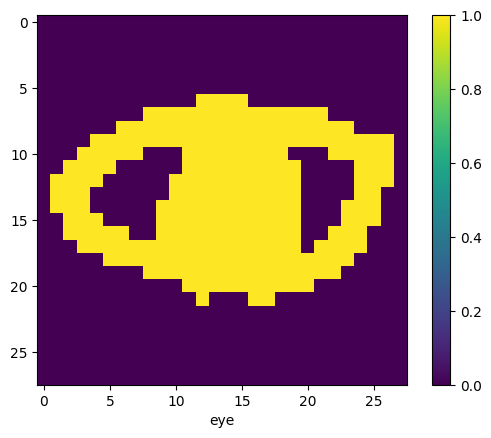

In [7]:
i = 2643
plt.figure()
plt.imshow(data[i])
plt.xlabel(class_names[int(labels[i])])
plt.colorbar()
plt.grid(False)
plt.show()

In [8]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(len(class_names), activation='softmax'))




In [9]:
model.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [10]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

history = model.fit(train_data, train_labels, epochs=2)

Epoch 1/2
27586/27586 [==============================] - 250s 9ms/step - loss: 0.1942 - accuracy: 0.9418
Epoch 2/2
27586/27586 [==============================] - 262s 9ms/step - loss: 0.1400 - accuracy: 0.9576


In [11]:
test_loss, test_acc = model.evaluate(test_data,  test_labels, verbose=2)
print(test_acc)

6897/6897 - 19s - loss: 0.1418 - accuracy: 0.9576 - 19s/epoch - 3ms/step
0.957558810710907


In [12]:
model.save("doodleModel.h5")